In [1]:
import pandas as pd
import numpy as np
import os
import re
import unicodedata as uni
from matplotlib import pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from plotly import express as px
import re
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
import time


plt.style.use('tableau-colorblind10')

warnings.filterwarnings('ignore')

In [3]:
nord_rev = pd.read_csv('/content/nord.csv',engine='python',index_col=False)
nord_rev.head(15)


,Unnamed: 0,product,title,rating,body
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good


In [4]:
nord_rev['review']=nord_rev['title']+" "+nord_rev['body']

In [5]:
nord_rev.head()

,Unnamed: 0,product,title,rating,body,review
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,Good phone Camera quality all overall good but...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,Good product Over all good product. But I want...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,Oneplus So far I'm enjoying it. I hope this wi...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,Ok Phone is good but camera is not that good a...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,Not upto mark Battery drain very fast ..camera...


In [6]:
nord_rev.isnull().sum()

Unnamed: 0      0
product         0
title           0
rating          0
body          115
review        115
dtype: int64

<Figure size 1800x1440 with 0 Axes>

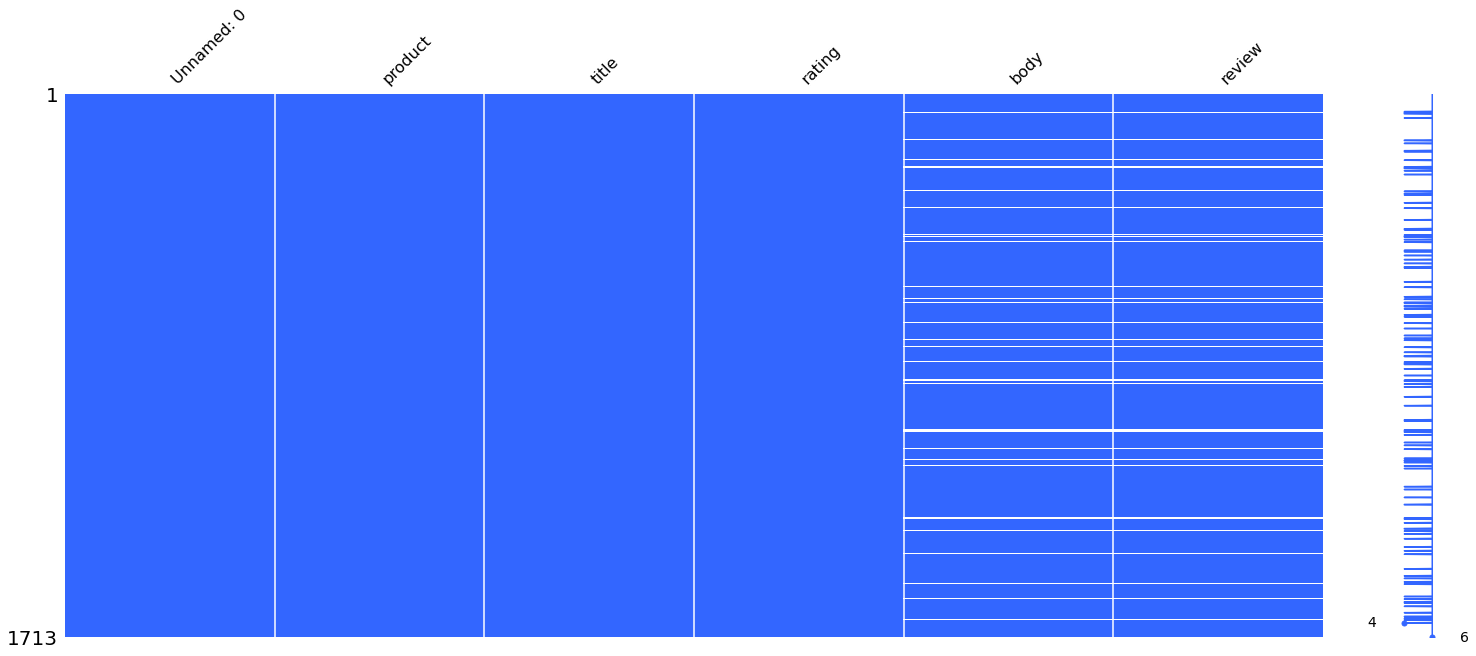

In [7]:
import matplotlib.pyplot as plt
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(nord_rev, color=[0.2, 0.4, 1])
plt.show()

In [8]:
nord_rev.dropna(inplace=True, axis=0)
nord_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1712
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1598 non-null   int64 
 1   product     1598 non-null   object
 2   title       1598 non-null   object
 3   rating      1598 non-null   int64 
 4   body        1598 non-null   object
 5   review      1598 non-null   object
dtypes: int64(2), object(4)
memory usage: 87.4+ KB


<Figure size 1800x1440 with 0 Axes>

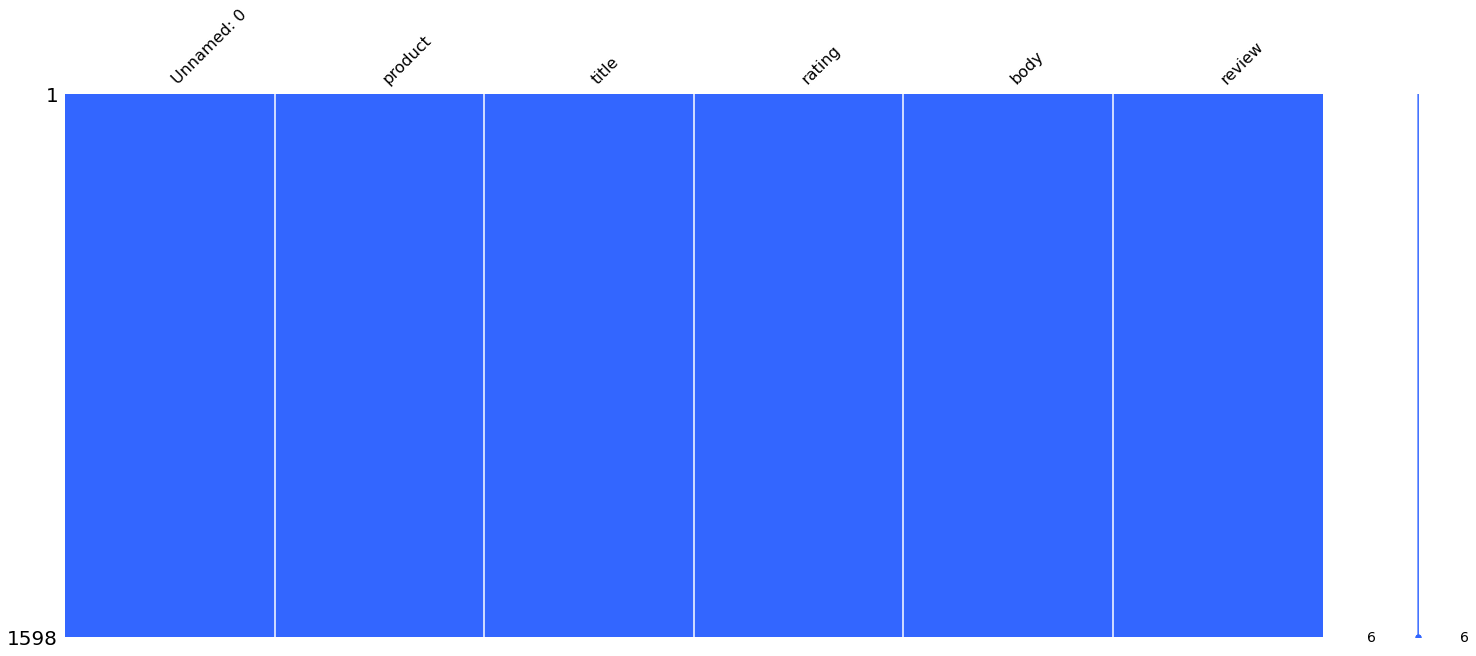

In [9]:
import matplotlib.pyplot as plt
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(nord_rev, color=[0.2, 0.4, 1])
plt.show()

In [10]:
emoji = re.compile("["
u"\U0001F600-\U0001F64F"  # emoticons
u"\U0001F300-\U0001F5FF"  # symbols & pictographs
u"\U0001F680-\U0001F6FF"  # transport & map symbols
u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
u"\U00002500-\U00002BEF"  # chinese char
u"\U00002702-\U000027B0"
u"\U00002702-\U000027B0"
u"\U000024C2-\U0001F251"
u"\U0001f926-\U0001f937"
u"\U00010000-\U0010ffff"
u"\u2640-\u2642" 
u"\u2600-\u2B55"
u"\u200d"
u"\u23cf"
u"\u23e9"
u"\u231a"
u"\ufe0f"  # dingbats
u"\u3030"              "]+",re.UNICODE)

In [11]:
def clean_reviews(text):
  text = str(text).lower()
  text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
  text = re.sub('\[.*?\]', '', text)
  text = uni.normalize('NFKD', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub(r'[[]]', ' ', text)
  text =  re.sub(emoji,'', text)
  return text

In [12]:
nord_rev['review'] = nord_rev['review'].apply(clean_reviews)

In [13]:
nord_rev.head(15)

,Unnamed: 0,product,title,rating,body,review
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,good phone camera quality all overall good but...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,good product over all good product. but i want...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,oneplus so far i'm enjoying it. i hope this wi...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,ok phone is good but camera is not that good a...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,not upto mark battery drain very fast ..camera...
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...,good phone battery charging is superfastno lag...
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...,super phone ho sakta tha jitani jaldi battary ...
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...,बैटरी ड्रेन बहुत जल्द हो रही है । हमने इसे अच...
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast,battery capacity was too bad when it is in loc...
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good,battery is not service battery is not service ...


In [14]:
pip install -U easynmt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.6 MB/s eta 0:00:00
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for easynmt: filename=EasyNMT-2.0.2-py3-none-any.whl size=19917 sha256=7f77aae3640e3c6a03034f58a977d3a4f7285b07dcfbc667aed46042951b2642
  Stored in directory: /root/.cache/pip/wheels/4d/9b/b5/44756a28f050e4e7835b959e90998b42985db542f3153cce26
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4401932 sha256=13b

In [15]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2f2ab3dd35b4f5fbd7d7d5461abd1093fce941dac7bcba77ad5084e0e6f22cb3
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [16]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang


In [17]:
nord_rev['lang']=nord_rev['review'].apply(det)

In [18]:
nord_rev.head(15)

,Unnamed: 0,product,title,rating,body,review,lang
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,good phone camera quality all overall good but...,Other
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,good product over all good product. but i want...,Other
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,oneplus so far i'm enjoying it. i hope this wi...,Other
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,ok phone is good but camera is not that good a...,Other
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,not upto mark battery drain very fast ..camera...,Other
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...,good phone battery charging is superfastno lag...,Other
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...,super phone ho sakta tha jitani jaldi battary ...,Other
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...,बैटरी ड्रेन बहुत जल्द हो रही है । हमने इसे अच...,Other
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast,battery capacity was too bad when it is in loc...,Other
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good,battery is not service battery is not service ...,Other


In [19]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

from langdetect import detect
from easynmt import EasyNMT
model = EasyNMT('opus-mt')



def detect_and_translate(text):

  for i in range(len(nord_rev['review'])):
      if (nord_rev['lang'] == 'en').all():
        time.sleep(1)
        return text

      else:
        translate_text=model.translate(text,target_lang='en')
        time.sleep(1)
        return translate_text

11.9kB [00:00, 11.0MB/s]                   


In [20]:
!pip install thai_segmenter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for thai_segmenter: filename=thai_segmenter-0.4.1-py2.py3-none-any.whl size=2510128 sha256=0eab38a453f9c829e786d2c7588591af043c7dcecad98ceecd54782e6bda4930
  Stored in directory: /root/.cache/pip/wheels/cd/64/8e/36f02ae748ab2d5ca0403c7e625f5f675284718d98ac0f85ed
Successfully built thai_segmenter


In [21]:
nord_rev['review_translate'] = nord_rev['review'].apply(lambda x:detect_and_translate(x))

100%|██████████| 938k/938k [00:00<00:00, 2.06MB/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
nord_rev.head(15)

,Unnamed: 0,product,title,rating,body,review,lang,review_translate
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,good phone camera quality all overall good but...,Other,good phone camera quality all overall good but...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,good product over all good product. but i want...,Other,good product over all good product. but i want...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,oneplus so far i'm enjoying it. i hope this wi...,Other,oneplus so far i'm enjoying it. i hope this wi...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,ok phone is good but camera is not that good a...,Other,ok phone is good but camera is not that good a...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,not upto mark battery drain very fast ..camera...,Other,not upto mark battery drain very fast ..camera...
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...,good phone battery charging is superfastno lag...,Other,good phone battery charging is superfastno lag...
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...,super phone ho sakta tha jitani jaldi battary ...,Other,super phone ho sakta tha jitani jaldi battary ...
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...,बैटरी ड्रेन बहुत जल्द हो रही है । हमने इसे अच...,Other,We bought it for a good battery backup that I ...
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast,battery capacity was too bad when it is in loc...,Other,battery capacity was too bad when it is in loc...
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good,battery is not service battery is not service ...,Other,battery is not service battery is not service ...


In [23]:
nord_rev.to_csv('nordrev.csv')


In [24]:
nord_rev.head(10)

,Unnamed: 0,product,title,rating,body,review,lang,review_translate
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,good phone camera quality all overall good but...,Other,good phone camera quality all overall good but...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,good product over all good product. but i want...,Other,good product over all good product. but i want...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,oneplus so far i'm enjoying it. i hope this wi...,Other,oneplus so far i'm enjoying it. i hope this wi...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,ok phone is good but camera is not that good a...,Other,ok phone is good but camera is not that good a...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,not upto mark battery drain very fast ..camera...,Other,not upto mark battery drain very fast ..camera...
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...,good phone battery charging is superfastno lag...,Other,good phone battery charging is superfastno lag...
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...,super phone ho sakta tha jitani jaldi battary ...,Other,super phone ho sakta tha jitani jaldi battary ...
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...,बैटरी ड्रेन बहुत जल्द हो रही है । हमने इसे अच...,Other,We bought it for a good battery backup that I ...
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast,battery capacity was too bad when it is in loc...,Other,battery capacity was too bad when it is in loc...
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good,battery is not service battery is not service ...,Other,battery is not service battery is not service ...
